In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the dataset
df = pd.read_csv("/Users/jimitpatel/Downloads/Zomato-data-.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
# Step 3: Data Cleaning & Preparation
# Clean and convert 'rate' column to float
def handleRate(value):
    value = str(value).split('/')
    return float(value[0])

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

df.info()
print(df.isnull().sum())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

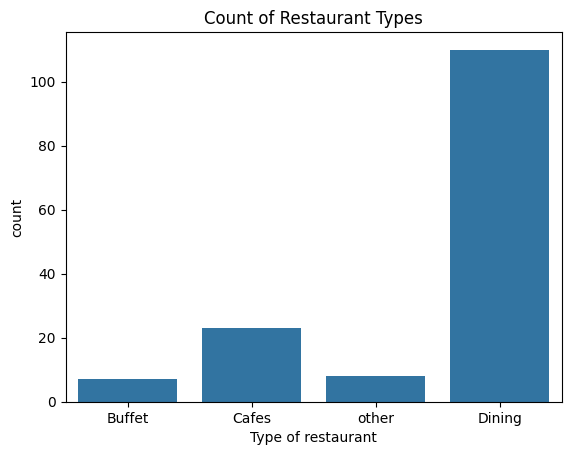

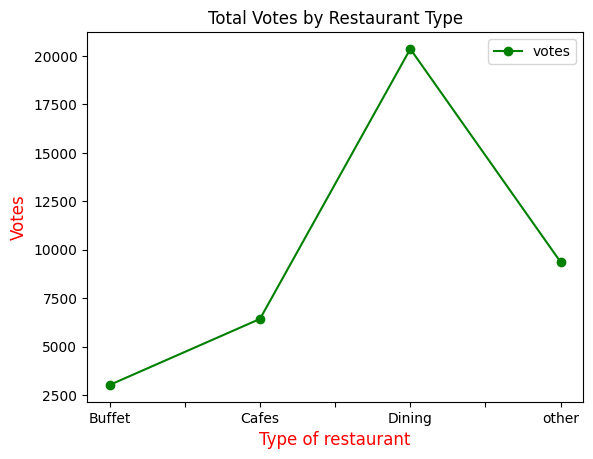

In [4]:
# Step 4: Exploring Restaurant Types
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.title("Count of Restaurant Types")
plt.show()

# Plotting total votes per restaurant type
grouped_votes = df.groupby('listed_in(type)')['votes'].sum()
pd.DataFrame({'votes': grouped_votes}).plot(marker='o', color='green')
plt.xlabel('Type of restaurant', color='red', size=12)
plt.ylabel('Votes', color='red', size=12)
plt.title("Total Votes by Restaurant Type")
plt.show()

In [5]:
# Step 5: Identify Most Voted Restaurant
max_votes = df['votes'].max()
top_rest = df.loc[df['votes'] == max_votes, 'name']
print("Restaurant(s) with maximum votes:\n", top_rest)

Restaurant(s) with maximum votes:
 38    Empire Restaurant
Name: name, dtype: object


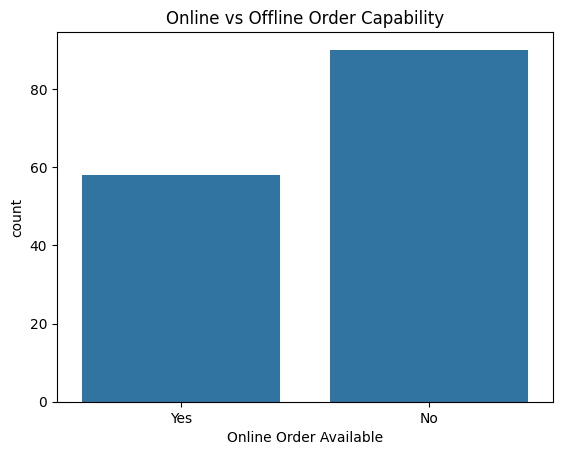

In [12]:
# Step 6: Online Order Availability
sns.countplot(x=df['online_order'])
plt.xlabel("Online Order Available")
plt.title("Online vs Offline Order Capability")
plt.show()

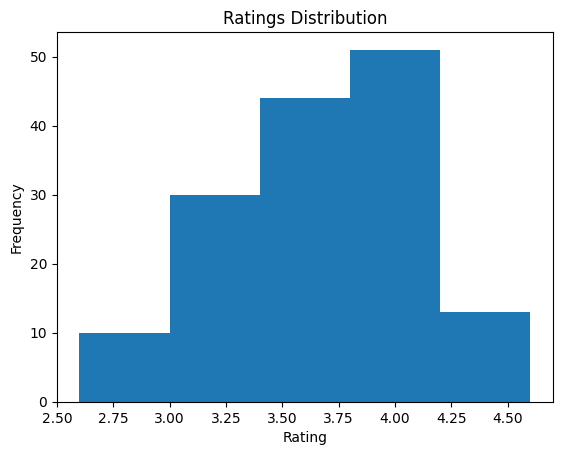

In [7]:
# Step 7: Analyze Ratings Distribution
plt.hist(df['rate'], bins=5)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

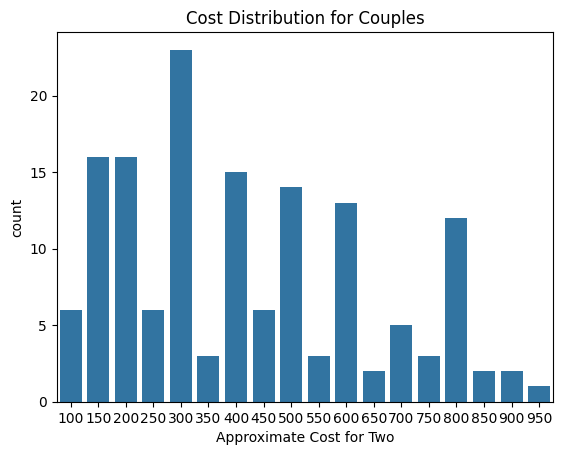

In [8]:
# Step 8: Approximate Cost for Couples
sns.countplot(x=df['approx_cost(for two people)'])
plt.xlabel('Approximate Cost for Two')
plt.title('Cost Distribution for Couples')
plt.show()

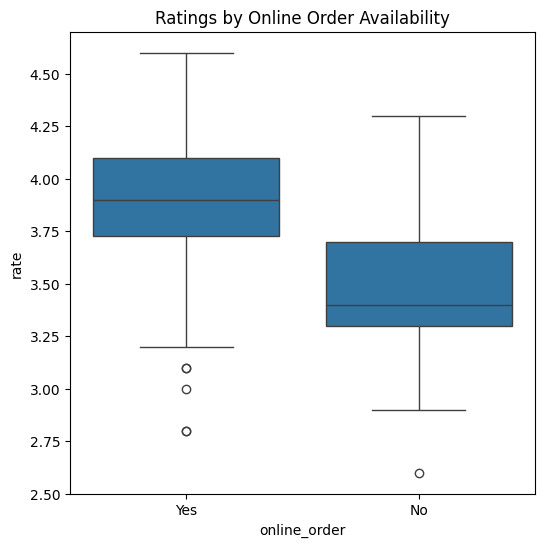

In [9]:
# Step 9: Ratings Comparison - Online vs Offline
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Ratings by Online Order Availability')
plt.show()

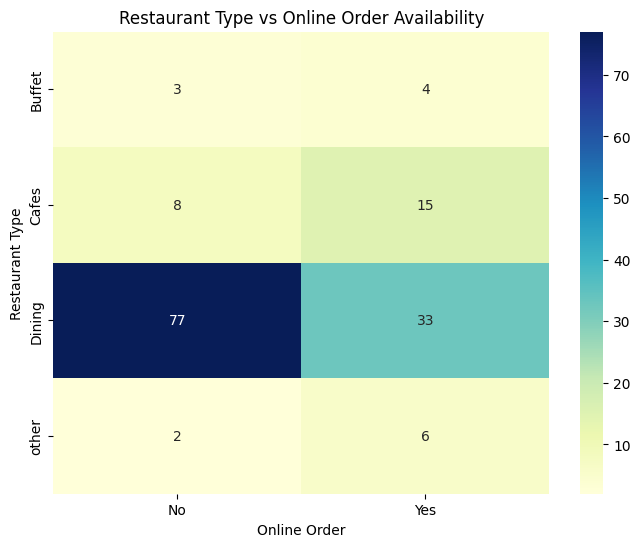

In [10]:
# Step 10: Order Mode Preferences by Restaurant Type (Heatmap)
pivot = df.pivot_table(index='listed_in(type)', columns='online_order',
                       aggfunc='size', fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Restaurant Type vs Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()